### **DESAFIO ETL - PROJETO TELECOM X**<br>
Descrição: <br>
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.<br>
Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos.<br> A partir da sua análise, os demais colegas da equipe de Data Science poderão avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.


ETL (Extract, Transform, Load - Extrair, Transformar e Carregar) é um processo de integração de dados que coleta informações de várias fontes, limpa e padroniza os dados, e os carrega em um repositório central (data warehouse ou lake) para análise e BI. Ele garante a consistência e qualidade dos dados para tomada de decisão.

Principais Etapas do ETL:<BR>
- Extrair (Extract): Coleta de dados brutos de sistemas de origem, como bancos de dados SQL, planilhas, CRM ou APIs.<BR>
- Transformar (Transform): Limpeza, padronização, agregação e aplicação de regras de negócio nos dados extraídos (ex: converter moedas, tratar campos nulos, remover duplicatas).<BR>
- Carregar (Load): Inserção dos dados transformados no destino final, como um data warehouse.

### ◾**EXTRAÇÃO**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importando o dataset no formato json, através de um arquivo do GitHub, gerando o link no Raw

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [9]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


Dicionário de dados: <br>
- customerID: número de identificação único de cada cliente<br>
- Churn: se o cliente deixou ou não a empresa<br>
- gender: gênero (masculino e feminino)<br>
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos<br>
- Partner: se o cliente possui ou não um parceiro ou parceira<br>
- Dependents: se o cliente possui ou não dependentes<br>
- tenure: meses de contrato do cliente<br>
- PhoneService: assinatura de serviço telefônico<br>
- MultipleLines: assisnatura de mais de uma linha de telefone<br>
- InternetService: assinatura de um provedor internet<br>
- OnlineSecurity: assinatura adicional de segurança online<br>
- OnlineBackup: assinatura adicional de backup online<br>
- DeviceProtection: assinatura adicional de proteção no dispositivo<br>
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera<br>
- StreamingTV: assinatura de TV a cabo<br>
- StreamingMovies: assinatura de streaming de filmes<br>
- Contract: tipo de contrato<br>
- PaperlessBilling: se o cliente prefere receber online a fatura<br>
- PaymentMethod: forma de pagamento<br>
- Charges.Monthly: total de todos os serviços do cliente por mês<br>
- Charges.Total: total gasto pelo cliente<br>

### ◾**TRANSFORMAÇÃO**

In [10]:
# Normalizando as colunas  JSON) que estão aninhadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Juntando os novos dataframes ao dataframe original
df_final = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df_final.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
# Removendo as colunas originais que foram normalizadas
df_final.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
# Dtype da coluna 'Charges.Total' está como object e deveria ser numérico
# Convertendo para numérico e se não conseguir converter fazer transformar em NaN:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final.dropna(inplace=True) #Apagando todas as linhas que tiverem qualquer valor NaN

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [14]:
# Padronizando a coluna Churn para formato numérico (1 = Yes, 0 = No)
df_final['Churn'] = df_final['Churn'].replace({'Yes': 1, 'No': 0})

# Verificando se deu certo:
df_final[['customerID', 'Churn']].head()

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1


In [15]:
df_final['Churn'].unique() #mostra todos os valores diferentes que existem dentro da coluna Churn

array([0, 1, ''], dtype=object)

Tem valores vazios ('') dentro da coluna Churn.
Corrigindo com NumPy:

In [17]:
# Transformar string vazia em NaN
df_final['Churn'] = df_final['Churn'].replace('', np.nan)

# Remover registros inválidos
df_final = df_final[df_final['Churn'].notnull()]

# Garantir que é inteiro
df_final['Churn'] = df_final['Churn'].astype(int)

#Vendo se agora deu certo:
df_final['Churn'].unique()

array([0, 1])

### ◾**LOAD (Carregamento & Análises)**

In [18]:
# Resumo estatístico das variáveis numéricas
df_final.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,64.798208,2283.300441
std,0.441782,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.587500,401.450000
50%,0.000000,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,0.000000,55.000000,89.862500,3794.737500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


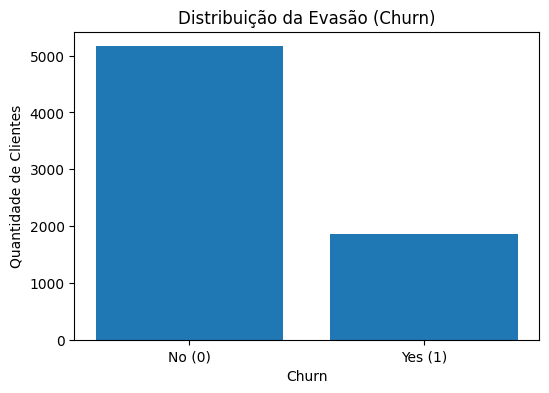

In [19]:
#Gráfico de barras para verificar como está a Distribuição do Churn

# Contagem dos valores
churn_counts = df_final['Churn'].value_counts()

# Criando o gráfico
plt.figure(figsize=(6,4))
plt.bar(['No (0)', 'Yes (1)'], churn_counts.sort_index())

plt.title('Distribuição da Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')

plt.show()

A empresa tem cerca de 1 em cada 4 clientes cancelando: aproximadamente 5000 clientes permaneceram (0) e quase 2000 clientes cancelaram (1). Isso dá algo em torno de 26% de churn, que é um índice alto.

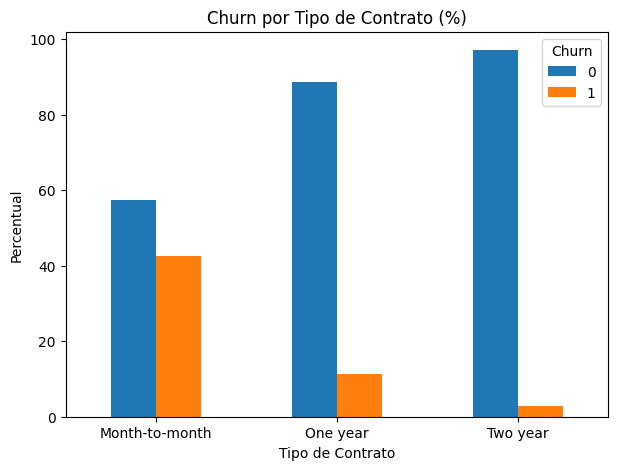

In [20]:
# Gráfico da evasão de clientes em relação ao tipo de contrato

contrato_churn = pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100  # Criando tabela percentual

#gerando o gráfico de barras
contrato_churn.plot(kind='bar', figsize=(7,5))

plt.title('Churn por Tipo de Contrato (%)')
plt.ylabel('Percentual')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)

plt.show()



Essse gráfico mostra que clientes com contrato mensal têm risco de cancelamento muito maior do que clientes com contrato anual ou bienal. (mês a mês = cerca de 43% cancelam e cerca de 57% permanecem, índice alto).

/tmp/ipython-input-332684296.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fatura_no, fatura_yes], labels=['No (0)', 'Yes (1)'])


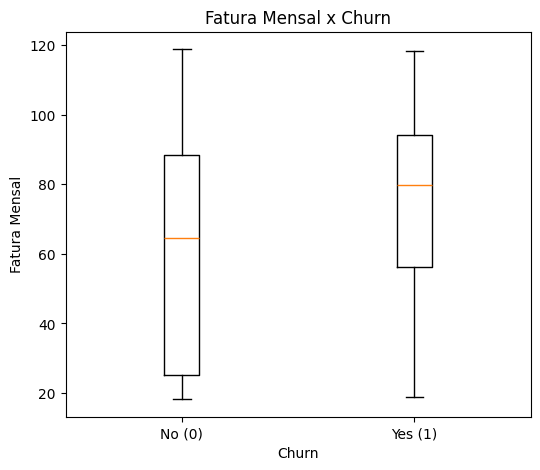

In [21]:
# Gráfico da evasão de clientes em relação à fatura mensal

# Separando os grupos
fatura_no = df_final[df_final['Churn'] == 0]['Charges.Monthly']
fatura_yes = df_final[df_final['Churn'] == 1]['Charges.Monthly']

plt.figure(figsize=(6,5))
plt.boxplot([fatura_no, fatura_yes], labels=['No (0)', 'Yes (1)'])

plt.title('Fatura Mensal x Churn')
plt.xlabel('Churn')
plt.ylabel('Fatura Mensal')

plt.show()

A mediana da fatura mensal para quem saiu (1) é maior do que para quem ficou (0). Isso significa que clientes que cancelam tendem a pagar mensalidades mais altas.

In [22]:
#tempo médio de contrato para quem cancelou e para quem não cancelou:
df_final.groupby('Churn')['tenure'].mean()

,tenure
Churn,
0,37.650010
1,17.979133


### **◾Relatório Final | Análise de Churn da Telecom X**


**Introdução**<br>
A Telecom X enfrenta um alto índice de evasão de clientes (churn), impactando diretamente sua receita e estabilidade financeira.<br>
O objetivo desta análise foi investigar os principais fatores associados ao cancelamento de clientes, utilizando técnicas de ETL e visualizações de gráficos de forma estratégica. <br>

**ETL: Extração e Tratamento dos Dados**<br>
Os dados foram obtidos via API em formato JSON e carregados em um DataFrame do Pandas. <br>
Foram realizadas as seguintes etapas:

- Normalização de colunas JSON aninhadas (customer, phone, internet, account)

- Remoção de colunas redundantes

- Conversão da coluna Charges.Total para tipo numérico

- Tratamento de valores ausentes

- Padronização da variável alvo Churn (0 = Não cancelou, 1 = Cancelou)

- Remoção de registros inconsistentes

Essas etapas garantiram integridade, consistência e qualidade dos dados para análise.

**Análise Exploratória e Insights**<br>

1) Taxa Geral de Evasão:

A taxa de churn observada foi aproximadamente 26%, indicando que cerca de 1 em cada 4 clientes cancela o serviço. Isso representa um índice relevante e justifica ações estratégicas de retenção.

2) Churn por Tipo de Contrato:

Clientes com contrato mensal apresentam risco significativamente maior de cancelamento. Mês a mês há cerca de 43% de evasão.

3) Fatura Mensal x Churn

A análise mostrou que clientes que cancelaram possuem, em média, faturas mensais mais altas.
Pode haver relação entre preço elevado e evasão, sugerindo sensibilidade ao custo ou percepção de baixo custo-benefício.

4) Tempo de Contrato (Tenure)

Clientes que permaneceram ativos possuem tempo médio de permanência significativamente maior.

- Clientes ativos: média de 37,65 meses

- Clientes que cancelaram: média de 17,98 meses

Clientes com menor tempo de relacionamento com a empresa apresentam maior tendência à evasão.
Observa-se que o risco de churn é mais elevado nos primeiros meses de contrato, sugerindo que a fase inicial do relacionamento com o cliente é crítica para retenção.

**Principais Conclusões**

Os principais fatores associados ao churn foram:

- Tipo de contrato (principal fator)

- Valor da fatura mensal

- Tempo de permanência

Clientes com contratos mensais, maior valor de cobrança, e com menor tempo de relacionamento com a empresa, apresentam maior risco de evasão.

**Recomendações Estratégicas**

- Criar incentivos para migração de contratos mensais para anuais ou bienais

- Oferecer descontos progressivos para fidelização

- Desenvolver estratégias de retenção para clientes com alta fatura mensal

- Monitorar clientes com baixo tempo de permanência